In [19]:
import pandas as pd
import numpy as np
import numpy.linalg as LA
import math
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path
import sys

In [2]:
def get_headers(df):
    keys = list(df.keys())[1:]
    headers = list()
    for key in keys:
        key = '_'.join(key.split('_')[:-2]).lower()
        if key not in headers:
            headers.append(key)
        else:
            break
    assert(len(set(headers)) == len(headers))
    return headers

In [3]:
def norm(x, L, a=[]):
    #L: L1, or L2.
    if(L not in range(1,8)):
        print("Error: L must be 1:7")
        exit()
    if(L == 1):
        return np.mean(np.abs(x))
    if(L == 2):
        return LA.norm(x,axis=1)/math.sqrt(len(x[0,:]))
    if(L == 3):
        return np.prod(np.power(x,1/len(x[0,:])),axis=1)
    if(L == 4):
        #weighted average
        return np.average(np.abs(x),weights=a)
    if(L == 5):
        #weighted product
        return np.prod(np.power(x,a/(np.sum(a))),axis=1)
    if(L == 6):
        #weighted product with linear depth weights as well
        depth = np.arange(len(x))+1
        a = a*depth
        return np.prod(np.power(x,a/(np.sum(a))))
    if(L == 7):
        depth = np.flip(np.arange(len(x))+1)
        a = a*depth
        return np.prod(np.power(x,a/(np.sum(a))))

In [11]:
f="../../outputs/results_date=2021-05-27-13-50-44_trial=0_ResNet34CIFAR_CIFAR10_Adasmomentum=0.9_weight_decay=0.0005_beta=0.98_linear=0.0_gamma=0.5_step_size=25.0_None_LR=0.03.xlsx"
df = pd.read_excel(f)
headers = get_headers(df)
#print(headers)
df = df.T
weights = np.ones(36)


in_KG_BE = np.asarray(df.iloc[headers.index('in_s_be') + 1::len(headers),:])
out_KG_BE = np.asarray(df.iloc[headers.index('out_s_be') + 1::len(headers),:])
in_MC_BE = np.asarray(df.iloc[headers.index('in_condition_be') + 1::len(headers),:])
out_MC_BE = np.asarray(df.iloc[headers.index('out_condition_be') + 1::len(headers),:])
in_ER_BE = np.asarray(df.iloc[headers.index('in_er_be') + 1::len(headers),:])
out_ER_BE = np.asarray(df.iloc[headers.index('out_er_be') + 1::len(headers),:])
in_KG_AE = np.asarray(df.iloc[headers.index('in_s') + 1::len(headers),:])
out_KG_AE = np.asarray(df.iloc[headers.index('out_s') + 1::len(headers),:])
in_MC_AE = np.asarray(df.iloc[headers.index('in_condition') + 1::len(headers),:])
out_MC_AE = np.asarray(df.iloc[headers.index('out_condition') + 1::len(headers),:])
in_ER_AE = np.asarray(df.iloc[headers.index('in_er_ae') + 1::len(headers),:])
out_ER_AE = np.asarray(df.iloc[headers.index('out_er_ae') + 1::len(headers),:])

tag = 'test_acc1'
if 'test_acc1' not in headers:
    tag = 'test_acc'
    if 'test_acc' not in headers:
        tag = 'acc'
test_acc = np.asarray(
    df.iloc[headers.index(tag) + 1::len(headers), :])
tag = 'train_acc1'
if 'train_acc1' not in headers:
    tag = 'train_acc'
try:
    train_acc = np.asarray(
        df.iloc[headers.index(tag) + 1::len(headers), :])
except:
    print(1)
train_loss = np.asarray(
            df.iloc[headers.index('train_loss') + 1::len(headers), :])
try:
    test_loss = np.asarray(
                df.iloc[headers.index('test_loss') + 1::len(headers), :])
except:
    print(2)


in_QG_BE = np.arctan2(in_KG_BE,(1-1/in_MC_BE))
out_QG_BE = np.arctan2(out_KG_BE,(1-1/out_MC_BE))
in_QG_AE = np.arctan2(in_KG_AE,(1-1/in_MC_AE))
out_QG_AE = np.arctan2(out_KG_AE,(1-1/out_MC_AE))

#print(in_QG_BE.shape)

in_QG_BE = [norm(in_QG_BE,2),norm(in_QG_BE,3),norm(in_QG_BE,5,weights)]
out_QG_BE = [norm(out_QG_BE,2),norm(out_QG_BE,3),norm(out_QG_BE,5,weights)]
in_QG_AE = [norm(in_QG_AE,2),norm(in_QG_AE,3),norm(in_QG_AE,5,weights)]
out_QG_BE = [norm(out_QG_AE,2),norm(out_QG_AE,3),norm(out_QG_AE,5,weights)]

in_ER_BE = [norm(in_ER_BE,2),norm(in_ER_BE,3),norm(in_ER_BE,5,weights)]
out_ER_BE = [norm(out_ER_BE,2),norm(out_ER_BE,3),norm(out_ER_BE,5,weights)]
in_ER_AE = [norm(in_ER_AE,2),norm(in_ER_AE,3),norm(in_ER_AE,5,weights)]
out_ER_AE = [norm(out_ER_AE,2),norm(out_ER_AE,3),norm(out_ER_AE,5,weights)]

#print(in_QG_AE)

<ipython-input-11-d64c37272bda>:46: RuntimeWarning: divide by zero encountered in true_divide
  in_QG_BE = np.arctan2(in_KG_BE,(1-1/in_MC_BE))
<ipython-input-11-d64c37272bda>:47: RuntimeWarning: divide by zero encountered in true_divide
  out_QG_BE = np.arctan2(out_KG_BE,(1-1/out_MC_BE))
<ipython-input-11-d64c37272bda>:48: RuntimeWarning: divide by zero encountered in true_divide
  in_QG_AE = np.arctan2(in_KG_AE,(1-1/in_MC_AE))
<ipython-input-11-d64c37272bda>:49: RuntimeWarning: divide by zero encountered in true_divide
  out_QG_AE = np.arctan2(out_KG_AE,(1-1/out_MC_AE))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

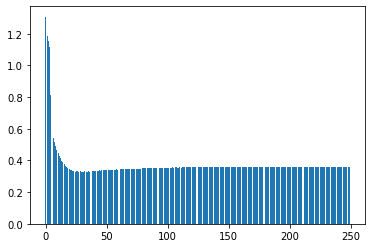

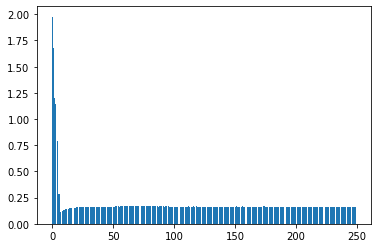

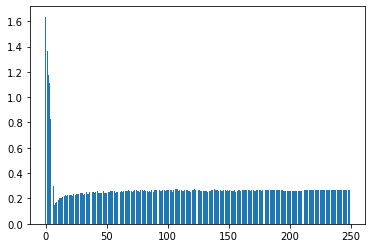

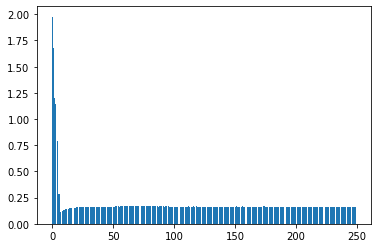

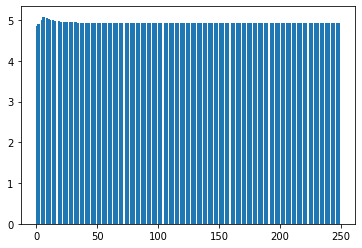

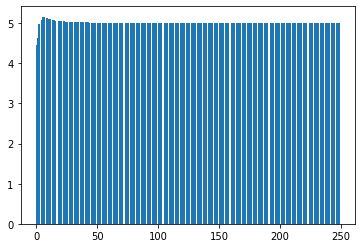

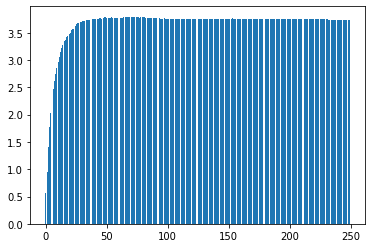

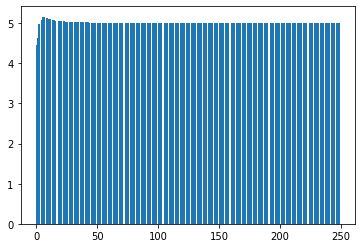

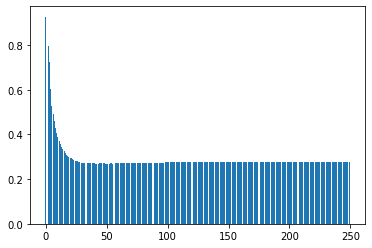

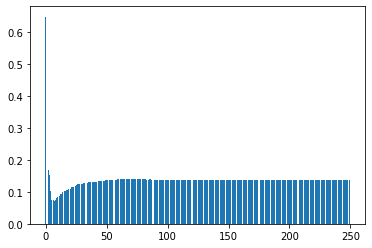

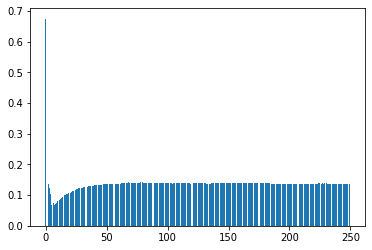

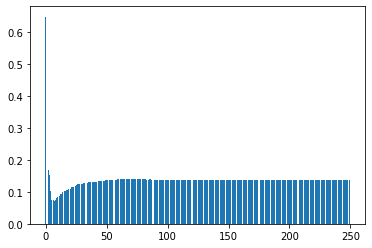

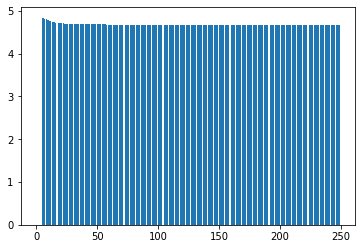

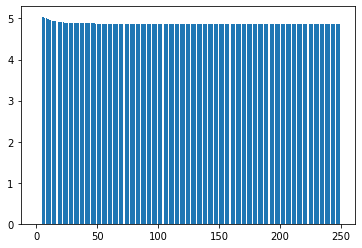

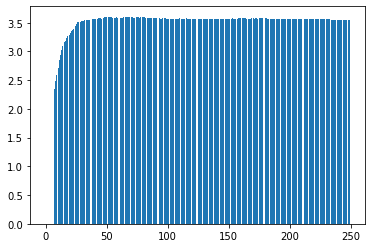

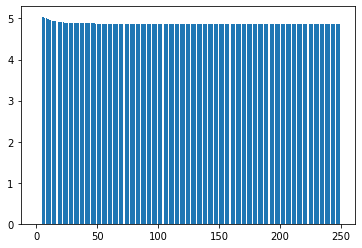

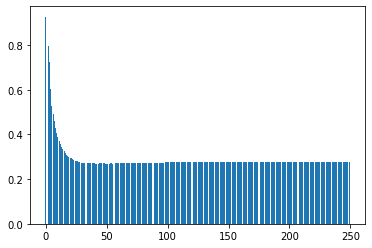

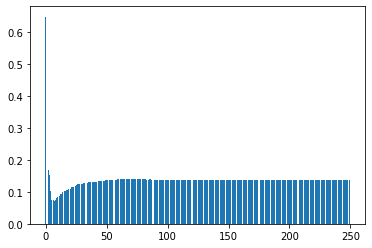

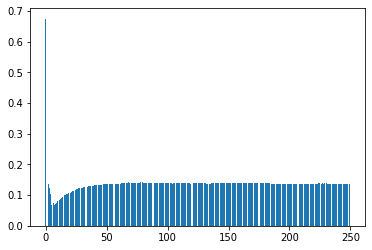

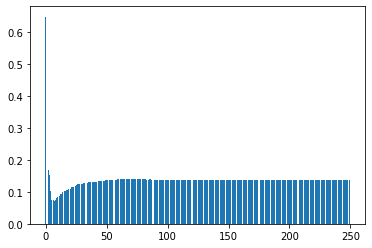

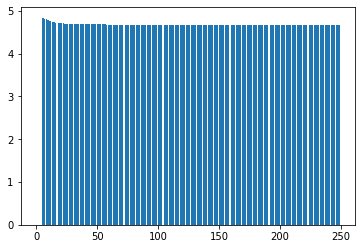

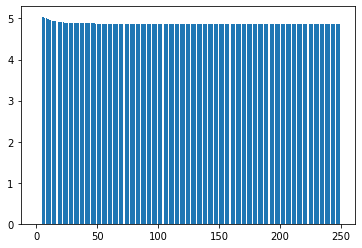

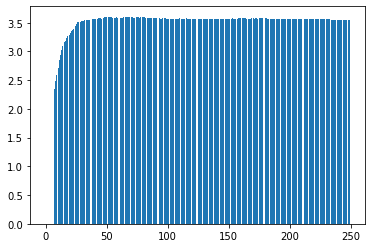

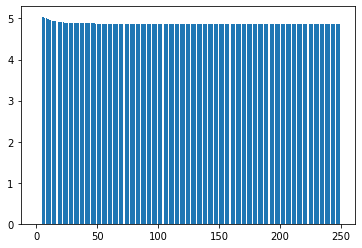

In [49]:
quality_names = ['in_QG_BE', 'out_QG_BE', 'in_QG_AE', 'out_QG_BE',
                 'in_ER_BE', 'out_ER_BE', 'in_ER_AE', 'out_ER_BE']
qualities     = [in_QG_BE, out_QG_BE, in_QG_AE, out_QG_BE,
                 in_ER_BE, out_ER_BE, in_ER_AE, out_ER_BE]
L = [2, 3, 5]
results = {}

epochs = list(range(250))
#print(epochs)

for l_index, l in enumerate(L):
    for index, q in enumerate(qualities):
        plt.bar(epochs,q[l_index])
        plt.ylabel(quality_names[index])
        plt.xlabel("Epochs")

        plt.show()
        plt.close()
        #(q[l_index], test_acc[:, 1])

In [40]:
#3 * 8 = 24 correlations:

quality_names = ['in_QG_BE', 'out_QG_BE', 'in_QG_AE', 'out_QG_BE',
                 'in_ER_BE', 'out_ER_BE', 'in_ER_AE', 'out_ER_BE']
qualities     = [in_QG_BE, out_QG_BE, in_QG_AE, out_QG_BE,
                 in_ER_BE, out_ER_BE, in_ER_AE, out_ER_BE]
L = [2, 3, 5]
results = {}

for l_index, l in enumerate(L):
    for index, q in enumerate(qualities):
        print("Index: ", index)
        print("q: ", quality_names[index])
        print("l_index: ", l_index)

        print(stats.spearmanr(q[l_index], test_acc[:, 1]))
        results[quality_names[index] + '_' + str(l)] = stats.spearmanr(q[l_index], test_acc[:, 1])

Index:  0
q:  in_QG_BE
l_index:  0
SpearmanrResult(correlation=0.55358725885214, pvalue=1.7790995432009458e-21)
Index:  1
q:  out_QG_BE
l_index:  0
SpearmanrResult(correlation=0.02860967069578974, pvalue=0.6525779386024049)
Index:  2
q:  in_QG_AE
l_index:  0
SpearmanrResult(correlation=0.49000406866763374, pvalue=1.6682378327700812e-16)
Index:  3
q:  out_QG_BE
l_index:  0
SpearmanrResult(correlation=0.02860967069578974, pvalue=0.6525779386024049)
Index:  4
q:  in_ER_BE
l_index:  0
SpearmanrResult(correlation=-0.08206262124975, pvalue=0.19594065462785878)
Index:  5
q:  out_ER_BE
l_index:  0
SpearmanrResult(correlation=-0.041579295914973155, pvalue=0.5128446330896919)
Index:  6
q:  in_ER_AE
l_index:  0
SpearmanrResult(correlation=-0.12228750643019187, pvalue=0.05347081627276859)
Index:  7
q:  out_ER_BE
l_index:  0
SpearmanrResult(correlation=-0.041579295914973155, pvalue=0.5128446330896919)
Index:  0
q:  in_QG_BE
l_index:  1
SpearmanrResult(correlation=0.3720186499774346, pvalue=1.263377